In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/Datasets/OCT2017_dataset.zip

Archive:  /content/drive/MyDrive/Datasets/OCT2017_dataset.zip
replace OCT2017/train/NORMAL/NORMAL-5060544-27.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import os
import cv2
 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
img_size = (224,224) # Intialising the Image size for resizing

def load_data():
    s=0
    images = []
    labels = []
    
    main_dir = os.listdir('/content/OCT2017/train')

    for j in main_dir:              
        img_dir_list = os.listdir('/content/OCT2017/train' + '/' + str(j))
        if len(img_dir_list) > 3000:
          img_dir_list = img_dir_list[:3000]
        if j in ['DRUSEN']: label = 0
        elif j in ['CNV']: label = 1
        elif j in ['NORMAL']: label = 2
        elif j in ['DME']: label = 3
        for k in img_dir_list:
          input_img = cv2.imread('/content/OCT2017/train' + '/'+ str(j) + '/'+ str(k))
          input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
          resized_img = cv2.resize(input_img,img_size)
          
          images.append(resized_img)
          labels.append(label)
          s=s+1
          print(s)
                
  
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    
    return images,labels
  
images,labels = load_data()
#/content/OCT2017/train/DRUSEN
#/content/OCT2017/train/DRUSEN/DRUSEN-1001666-1.jpeg
print(images.shape)
print(labels)

Streaming output truncated to the last 5000 lines.
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192

In [ ]:
images, labels = shuffle(images, labels, random_state=10)
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size = 0.2)

In [ ]:
n_train = train_labels.shape[0]
n_val = val_labels.shape[0]

print("Number of training examples: {}".format(n_train))
print("Number of validation examples: {}".format(n_val))


print("Training images are of shape: {}".format(train_images.shape))
print("Training labels are of shape: {}".format(train_labels.shape))
print("Validation images are of shape: {}".format(val_images.shape))
print("Validation labels are of shape: {}".format(val_labels.shape))


Number of training examples: 9600
Number of validation examples: 2400
Training images are of shape: (9600, 224, 224)
Training labels are of shape: (9600,)
Validation images are of shape: (2400, 224, 224)
Validation labels are of shape: (2400,)


In [ ]:
x_train = (np.reshape(train_images, (-1, 224*224)) / 255.0)
x_val = (np.reshape(val_images, (-1, 224*224)) / 255.0)

In [ ]:
from tensorflow.keras.utils import to_categorical
print(train_labels[0 : 3], '\n')

y_train = to_categorical(train_labels, num_classes = 4)
y_val = to_categorical(val_labels, num_classes = 4)

print(y_train[0 : 3, :])

[1 0 2] 

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
inp_layer = Input(shape = (224*224,))
hidden_layer1 = Dense(units =300, activation = 'relu')(inp_layer)
hidden_layer2 = Dense(units=200, activation = 'relu')(hidden_layer1)
out_layer = Dense(units =4 , activation = 'softmax')(hidden_layer2)

model_mlp = Model(inputs = inp_layer, outputs = out_layer)
model_mlp.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50176)]           0         
                                                                 
 dense_6 (Dense)             (None, 300)               15053100  
                                                                 
 dense_7 (Dense)             (None, 200)               60200     
                                                                 
 dense_8 (Dense)             (None, 4)                 804       
                                                                 
Total params: 15,114,104
Trainable params: 15,114,104
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
results = model_mlp.fit(x_train, y_train, batch_size=128, epochs=15, validation_data = (x_val, y_val))

Epoch 1/15
75/75 [==============================] - 16s 205ms/step - loss: 2.5914 - accuracy: 0.2851 - val_loss: 1.4468 - val_accuracy: 0.3421
Epoch 2/15
75/75 [==============================] - 15s 202ms/step - loss: 1.4129 - accuracy: 0.3483 - val_loss: 1.3491 - val_accuracy: 0.3971
Epoch 3/15
75/75 [==============================] - 15s 202ms/step - loss: 1.3355 - accuracy: 0.3935 - val_loss: 1.3564 - val_accuracy: 0.3958
Epoch 4/15
75/75 [==============================] - 16s 212ms/step - loss: 1.2709 - accuracy: 0.4252 - val_loss: 1.2781 - val_accuracy: 0.3871
Epoch 5/15
75/75 [==============================] - 15s 202ms/step - loss: 1.1997 - accuracy: 0.4676 - val_loss: 1.2350 - val_accuracy: 0.4346
Epoch 6/15
75/75 [==============================] - 15s 202ms/step - loss: 1.1571 - accuracy: 0.5014 - val_loss: 1.2843 - val_accuracy: 0.4125
Epoch 7/15
75/75 [==============================] - 15s 203ms/step - loss: 1.1481 - accuracy: 0.4983 - val_loss: 1.2367 - val_accuracy: 0.4442

In [ ]:
img_size = (224,224) # Intialising the Image size for resizing

def load_data_test():
    s=0
    images = []
    labels = []
    
    main_dir = os.listdir('/content/OCT2017/test')

    for j in main_dir:              
        img_dir_list = os.listdir('/content/OCT2017/test' + '/' + str(j))
        if len(img_dir_list) > 2000:
          img_dir_list = img_dir_list[:2000]
        if j in ['DRUSEN']: label = 0
        elif j in ['CNV']: label = 1
        elif j in ['NORMAL']: label = 2
        elif j in ['DME']: label = 3
        for k in img_dir_list:
          input_img = cv2.imread('/content/OCT2017/test' + '/'+ str(j) + '/'+ str(k))
          input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
          resized_img = cv2.resize(input_img,img_size)
          
          images.append(resized_img)
          labels.append(label)
          s=s+1
          print(s)
                
  
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    
    return images,labels

images1,labels1 = load_data_test()
#/content/OCT2017/train/DRUSEN
#/content/OCT2017/train/DRUSEN/DRUSEN-1001666-1.jpeg
print(images1.shape)
print(labels1.shape)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
n_test = labels1.shape[0]

print("Number of test examples: {}".format(n_test))

print("Test images are of shape: {}".format(images1.shape))


Number of test examples: 968
Test images are of shape: (968, 224, 224)


In [ ]:
x_test = (np.reshape(images1, (-1, 224*224)) / 255.0)
print(f'Total data for Test: {x_test.shape[0]}, Test X shape: {x_test.shape}')

Total data for Test: 968, Test X shape: (968, 50176)


In [ ]:
from tensorflow.keras.utils import to_categorical
print(labels1[0 : 3], '\n')

y_test = to_categorical(labels1, num_classes = 4)
print(y_test[0 : 3, :])

[2 2 2] 

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [ ]:
y_hat = np.argmax(model.predict(x_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_hat))

              precision    recall  f1-score   support

           0       0.18      0.02      0.04       242
           1       0.18      0.12      0.14       242
           2       0.24      0.74      0.36       242
           3       0.44      0.02      0.03       242

    accuracy                           0.23       968
   macro avg       0.26      0.23      0.14       968
weighted avg       0.26      0.23      0.14       968



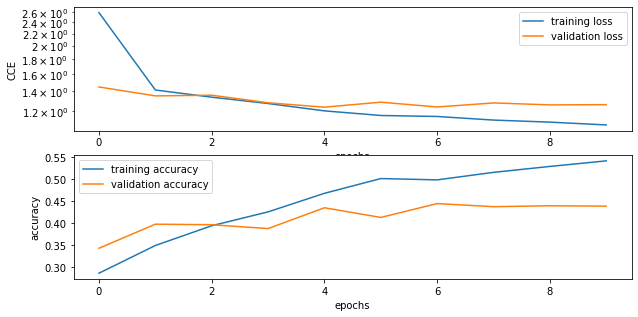

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

train_loss = results.history['loss'][0:10]
val_loss = results.history['val_loss'][0:10]
train_acc = results.history['accuracy'][0:10]
val_acc = results.history['val_accuracy'][0:10]

plt.subplots(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('CCE')

plt.subplot(2, 1, 2)
plt.plot(train_acc)
plt.plot(val_acc)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

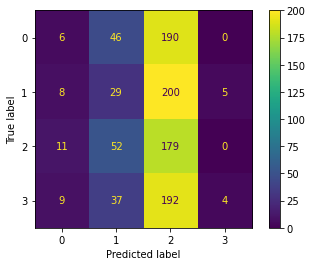

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(test_labels, y_hat)